<a href="https://colab.research.google.com/github/bamercado123/STAT520-Bayes-Module_BM/blob/main/SampleForkClone520.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’




[1] "Observed Proportion, Posterior Mean"
[1] 0.0000000 0.3333333
[1] "Observed Mean, Posterior Mean"
[1] 23.07887 24.29098


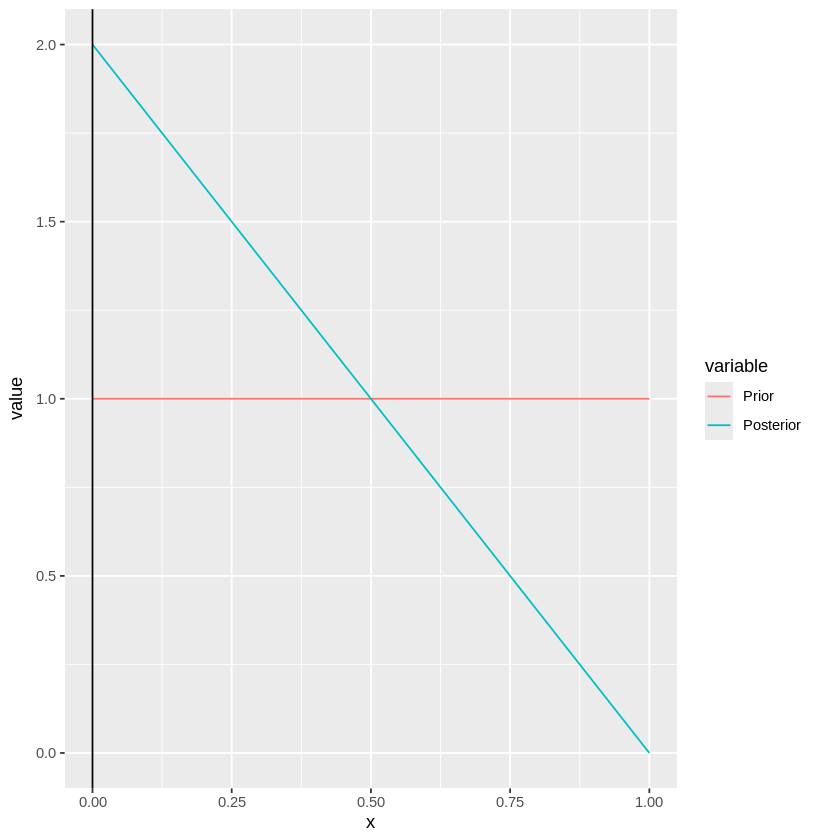

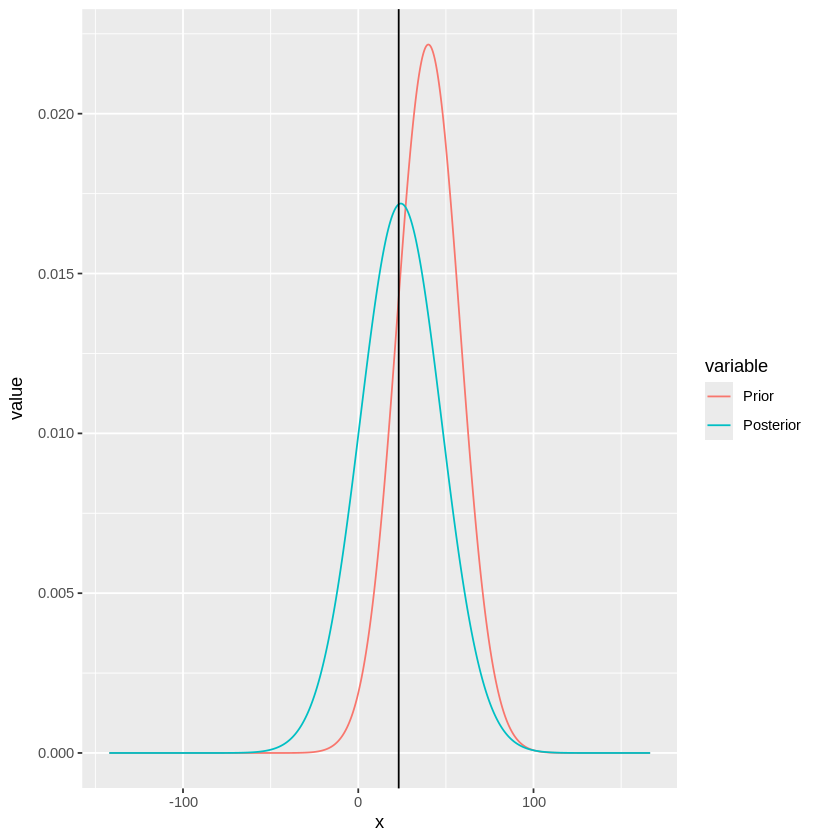

In [2]:
if (!requireNamespace("ggplot2", quietly = TRUE)) {
  install.packages("ggplot2")
}
if (!requireNamespace("reshape2", quietly = TRUE)) {
  install.packages("reshape2")
}
library(ggplot2)
library(reshape2)

#Inference for Binomial with Beta Prior
BBB<-function(n,p,alpha,beta)
{
  xx<-rbinom(1,n,p)
  p_hat<-xx/n
  print("Observed Proportion, Posterior Mean")
  p_hat_Post<-(alpha+xx)/(n+alpha+beta)
  print(c(p_hat,p_hat_Post))
  x  <- seq(0, 1, 0.01)
  Prior <- dbeta(x,alpha,beta)
  Posterior <- dbeta(x,alpha+xx,n+beta-xx)

  df <- data.frame(x, Prior, Posterior)

  # melt the data to a long format
  df2 <- reshape2::melt(data = df, id.vars = "x")

  # plot, using the aesthetics argument 'colour'
  ggplot(data = df2, aes(x = x, y = value, colour = variable)) + geom_line() + geom_vline(xintercept=p_hat)


}

n<-1
p<-0.3
alpha<-1
beta<-1

BBB(n,p,alpha,beta)
#Inference for Normal with Normal Prior
BNN<-function(n,mu,sigma,theta,tau)
{
  xx<-rnorm(n,mu,sigma)
  xbar<-mean(xx)
  theta_post<-(theta*sigma^2+n*xbar*tau^2)/(sigma^2+n*tau^2)
  tau_post<-(sigma^2*tau^2)/(sigma^2+n*tau^2)
  print("Observed Mean, Posterior Mean")
  xbar_Post<-theta_post
  print(c(xbar,xbar_Post))
  a<-min(xx)-1
  b<-max(xx)+1
  x  <- seq(a, b, 0.01)
  Prior <- dnorm(x,theta,tau)
  Posterior <- dnorm(x,theta_post,tau_post)

  df <- data.frame(x, Prior, Posterior)

  # melt the data to a long format
  df2 <- reshape2::melt(data = df, id.vars = "x")

  # plot, using the aesthetics argument 'colour'
  ggplot(data = df2, aes(x = x, y = value, colour = variable)) + geom_line() + geom_vline(xintercept=xbar)


}

BNN(100,25,50,40,18)